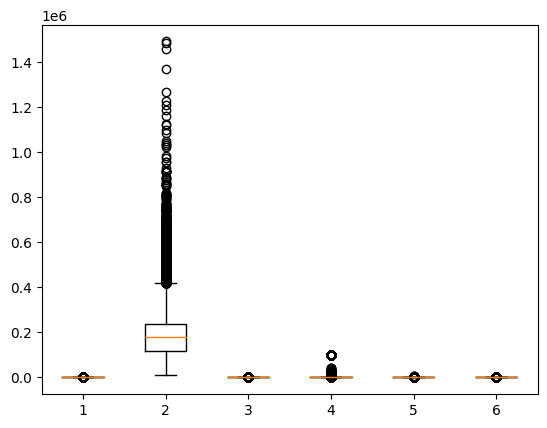

   age  workclass  fnlwgt  education  educational-num  marital-status  \
0   25          4  220148          1                7               4   
1   38          4   89814         11                9               2   
2   28          2  220148          7               12               2   
3   44          4  160323         15               10               2   
4   18          0  103497         15               10               4   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           7             3     2       1             0             0   
1           5             0     4       1             0             0   
2          11             0     4       1             0             0   
3           7             0     2       1          7688             0   
4           0             3     4       0             0             0   

   hours-per-week  native-country income  capital-total  high-education  
0              40              39  <=50K        

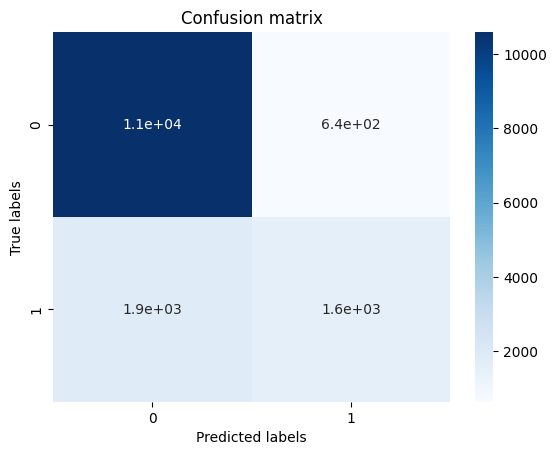

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the dataset into a pandas dataframe
df = pd.read_csv('adult.csv')

# Encode categorical variables
cat_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Handle missing values
#df.replace('?', np.nan, inplace=True)
#df.dropna(inplace=True)

# Handling Outliers
num_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
plt.boxplot(df[num_cols])
plt.show()
df[num_cols] = winsorize(df[num_cols].values, limits=[0.05, 0.05])

# Feature Engineering
df['capital-total'] = df['capital-gain'] - df['capital-loss']
df['high-education'] = np.where(df['educational-num'] >= 13, 1, 0)

# Imputing Missing Values
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Sampling Techniques
# oversample = RandomOverSampler(sampling_strategy='minority')
# X, y = oversample.fit_resample(X, y)

# One-Hot Encoding
# cat_cols_ohe = ['education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
# X = pd.get_dummies(X, columns=cat_cols_ohe)

# Split the dataset into training and testing sets
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale numerical variables
num_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Create a logistic regression model
model = LogisticRegression(penalty='l1', solver='liblinear',max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the income on the testing data
y_pred = model.predict(X_test)

# View the cleaned and preprocessed dataset
print(df.head())

# Evaluate the performance of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,pos_label='>50K'))
print("Recall:", recall_score(y_test, y_pred,pos_label='>50K'))
print("F1-Score:", f1_score(y_test, y_pred,pos_label='>50K'))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()